<h1> COVID-19 Radiography Detection <h1>

<img src="Virus-image-Example-1.png" align='center'>

<h2> Glossary <h2>

<b>Pneumonia</b> According to the Mayo Clinic, pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

<b>Viral Pneumonia</b> Viral pneumonia is an infection that inflames the air sacs in one or both lungs that is caused by a virus. 

<b>COVID-19</b> According to the World Health Organization, Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness. 

<h2> Imports and Data Loading <h2>

In [237]:
# Data preprocessing
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from tqdm import tqdm
import cv2

# Deep learning
from keras import backend as K
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf 
from tensorflow.keras.preprocessing import image

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [187]:
DATASET_DIR = "COVID-19 Radiography Database"

os.listdir(DATASET_DIR)

['.DS_Store',
 'Viral Pneumonia',
 'NORMAL.metadata.xlsx',
 'COVID-19',
 'Viral Pneumonia.matadata.xlsx',
 'COVID-19.metadata.xlsx',
 'NORMAL',
 'README.md.txt']

<h2>Exploratory Data Analysis<h2>

In [188]:
normal_lungs = []
count = 0

for img_path in glob.glob(DATASET_DIR + "/NORMAL/*"):
    count += 1
    normal_lungs.append(image.load_img(str(img_path), target_size = (224,224,3)))
    if count > 100:
        break

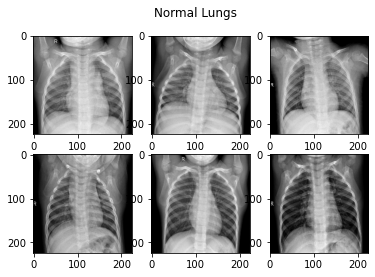

In [189]:
f, axarr = plt.subplots(2,3)
f.suptitle("Normal Lungs")
axarr[0,0].imshow(normal_lungs[0])
axarr[0,1].imshow(normal_lungs[1])
axarr[1,0].imshow(normal_lungs[2])
axarr[1,1].imshow(normal_lungs[3])
axarr[0,2].imshow(normal_lungs[4])
axarr[1,2].imshow(normal_lungs[5])

In [190]:
viral_lungs = []
count = 0

for img_path in glob.glob(DATASET_DIR + "/Viral Pneumonia/*"):
    count += 1
    viral_lungs.append(image.load_img(str(img_path), target_size = (224,224,3)))
    if count > 100:
        break

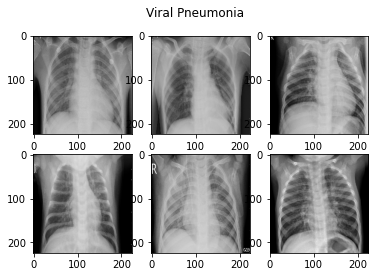

In [191]:
f, axarr = plt.subplots(2,3)
f.suptitle("Viral Pneumonia")
axarr[0,0].imshow(viral_lungs[0])
axarr[0,1].imshow(viral_lungs[1])
axarr[1,0].imshow(viral_lungs[2])
axarr[1,1].imshow(viral_lungs[3])
axarr[0,2].imshow(viral_lungs[4])
axarr[1,2].imshow(viral_lungs[5])

In [192]:
COVID_lungs = []
count = 0

for img_path in glob.glob(DATASET_DIR + "/COVID-19/*"):
    count += 1
    COVID_lungs.append(image.load_img(str(img_path), target_size = (224,224,3)))
    if count > 100:
        break

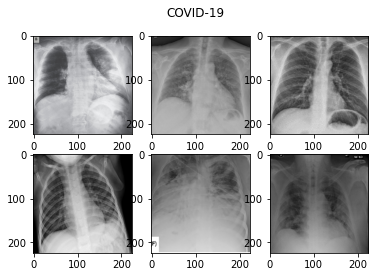

In [193]:
f, axarr = plt.subplots(2,3)
f.suptitle("COVID-19")
axarr[0,0].imshow(COVID_lungs[0])
axarr[0,1].imshow(COVID_lungs[1])
axarr[1,0].imshow(COVID_lungs[2])
axarr[1,1].imshow(COVID_lungs[3])
axarr[0,2].imshow(COVID_lungs[4])
axarr[1,2].imshow(COVID_lungs[5])

In [194]:
print(str(len(normal_images))+" Normal lung images")
print(str(len(pneumonia_images))+" Pneumonia lung images")
print(str(len(COVID_images))+" Covid-19 lung images")

1341 Normal lung images
1345 Pneumonia lung images
219 Covid-19 lung images


In [195]:
normal_imgs = [fn for fn in os.listdir(DATASET_DIR + "/NORMAL")]
pneumo_imgs = [fn for fn in os.listdir(DATASET_DIR + "/Viral Pneumonia")]
COVID_imgs = [fn for fn in os.listdir(DATASET_DIR + "/COVID-19")]

In [196]:
def tonumpy(path, filenames, size = (64, 64)):
    for fn in filenames:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        img_matrix = image.img_to_array(current_image)
        img_matrix = [img_matrix.ravel()]
        try:
            img_vector = np.concatenate((img_vector, img_matrix))
        except UnboundLocalError: 
            img_vector = img_matrix
    return img_vector

normal_images = tonumpy(DATASET_DIR+"/NORMAL/", normal_imgs)
pneumonia_images = tonumpy(DATASET_DIR+"/Viral Pneumonia/", pneumo_imgs)
COVID_images = tonumpy(DATASET_DIR+"/COVID-19/", COVID_imgs)

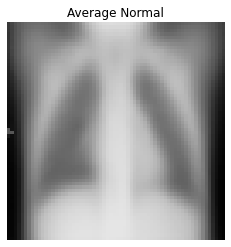

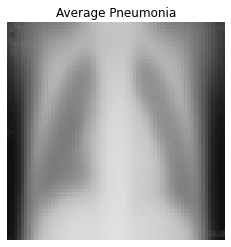

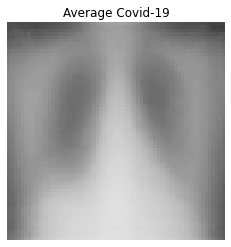

In [197]:
def find_mean_img(img_vector, title, size = (64, 64)):
    mean_img = np.mean(img_vector, axis = 0)
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

normal_mean = find_mean_img(normal_images, 'Normal')
pneumo_mean = find_mean_img(pneumonia_images, 'Pneumonia')
COVID_mean = find_mean_img(COVID_images, 'Covid-19')

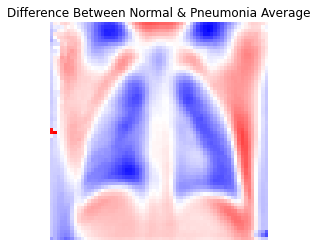

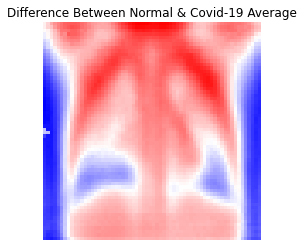

In [73]:
normal_pneumo_mean = normal_mean - pneumo_mean
plt.imshow(normal_pneumo_mean, cmap='bwr')
plt.title(f'Difference Between Normal & Pneumonia Average')
plt.axis('off')
plt.show()
normal_covid_mean = normal_mean - COVID_mean
plt.imshow(normal_covid_mean, cmap='bwr')
plt.title(f'Difference Between Normal & Covid-19 Average')
plt.axis('off')
plt.show()

Normal Eigenlungs Principal components:  27


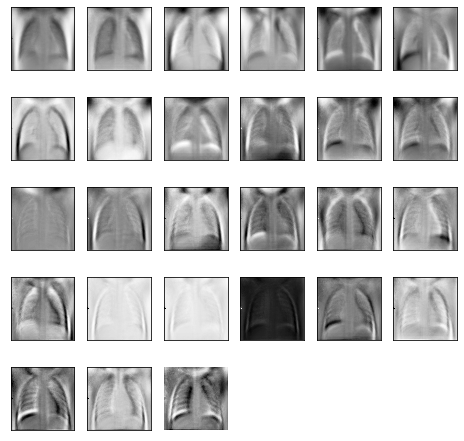

Pneumonia Eigenlungs Principal components:  13


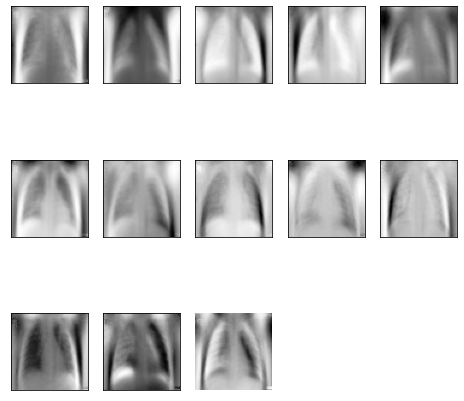

Covid-19 Eigenlungs Principal components:  8


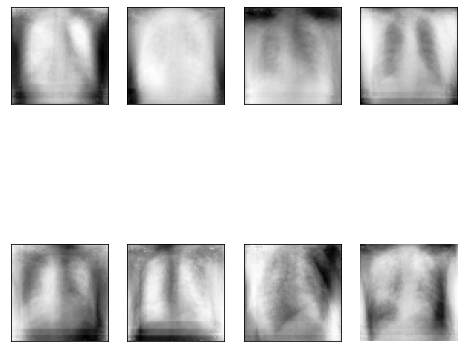

In [89]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(img_vector, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(img_vector)
    print(title + ' Eigenlungs Principal components: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()
    
plot_pca(eigenimages(normal_images, 'Normal'))
plot_pca(eigenimages(pneumonia_images, 'Pneumonia'))
plot_pca(eigenimages(COVID_images, 'Covid-19'))

<h2>Preprocessing<h2>

In [315]:
imagePaths = []
for dirname, _, filenames in os.walk('COVID-19 Radiography Database/'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

In [316]:
X = []
Y = []
imgSize = 224
hmap = {'Viral Pneumonia': 'Pneumonia', 'NORMAL': 'Normal', 'COVID-19': 'Covid-19'}
for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (imgSize, imgSize))

    X.append(image)
    Y.append(hmap[label])

100%|██████████| 2905/2905 [00:40<00:00, 72.54it/s]


In [317]:
print('Covid-19:',Y.count('Covid-19'))
print('Normal:',Y.count('Normal'))
print('Pneumonia: ',Y.count('Pneumonia'))

Covid-19: 219
Normal: 1341
Pneumonia:  1345


In [318]:
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
Y = to_categorical(Y)

In [319]:
X_train, X_1, y_train, y_1 = train_test_split(np.array(X), np.array(Y), test_size=0.2, random_state=42,stratify=Y)
X_cv, X_test, y_cv, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42,stratify=y_1)

In [320]:
img_width = img_height = 224

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
    X_train=X_train.reshape(X_train.shape[0],3,img_width,img_height)
    X_cv=X_cv.reshape(X_cv.shape[0],3,img_width,img_height)
    X_test=X_test.reshape(X_test.shape[0],3,img_width,img_height)
    
else:
    input_shape = (img_width, img_height, 3)
    X_train=X_train.reshape(X_train.shape[0],img_width,img_height,3)
    X_cv=X_cv.reshape(X_cv.shape[0],img_width,img_height,3)
    X_test=X_test.reshape(X_test.shape[0],img_width,img_height,3)

In [322]:
def plt_dynamic(x,vy,ty,ax,colors=['b']):
  ax.plot(x,vy,'b',label='Validation Loss')
  ax.plot(x,ty,'r',label='Train Loss')
  plt.legend()
  plt.grid()
  fig.canvas.draw()

<h2> Neural Network<h2>

In [323]:
neural_network = Sequential()

neural_network.add(Dense(64, activation='relu', input_shape=(input_shape)))
neural_network.add(BatchNormalization())

neural_network.add(Dense(64, activation='relu'))
neural_network.add(BatchNormalization())

neural_network.add(Dense(64, activation='relu'))
neural_network.add(BatchNormalization())
neural_network.add(Dropout(0.3))

neural_network.add(Dense(3, activation='softmax'))

neural_network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<h2>Training<h2>

In [324]:
history = model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(X_cv,y_cv))

Epoch 1/10
73/73 [==============================] - 46s 626ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.3555 - val_accuracy: 0.9483
Epoch 2/10
73/73 [==============================] - 46s 624ms/step - loss: 0.0144 - accuracy: 0.9966 - val_loss: 0.3838 - val_accuracy: 0.9569
Epoch 3/10
73/73 [==============================] - 45s 618ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.2613 - val_accuracy: 0.9591
Epoch 4/10
73/73 [==============================] - 47s 639ms/step - loss: 0.0040 - accuracy: 0.9978 - val_loss: 0.2924 - val_accuracy: 0.9634
Epoch 5/10
73/73 [==============================] - 46s 628ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2647 - val_accuracy: 0.9591
Epoch 6/10
73/73 [==============================] - 46s 633ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3004 - val_accuracy: 0.9569
Epoch 7/10
73/73 [==============================] - 46s 635ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.3018 - val_accuracy: 0.9612

<h2>Evaluating<h2>

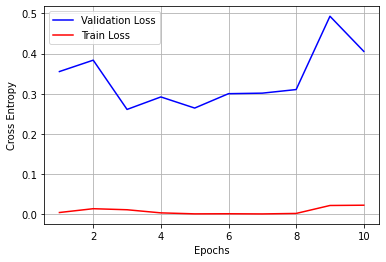

In [325]:
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Cross Entropy')

x=list(range(1,10+1))

vy=history.history['val_loss']
ty=history.history['loss']
plt_dynamic(x,vy,ty,ax)

(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

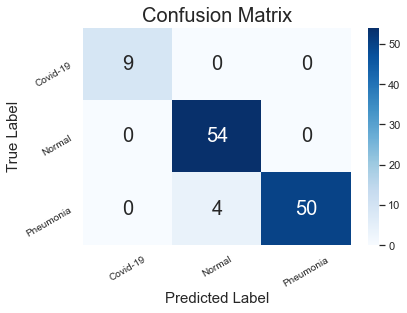

In [364]:
import seaborn as sns
y_pred=model.predict(X_test).round()
x=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
Cm_df=pd.DataFrame(x,index=encoder.classes_,columns=encoder.classes_)

sns.set(font_scale=1,color_codes=True,palette='deep')
sns.heatmap(Cm_df,annot=True,annot_kws={'size':20},fmt='d',cmap='Blues')
plt.ylabel("True Label", fontsize=15)
plt.xlabel("Predicted Label", fontsize=15)
plt.title('Confusion Matrix', fontsize=20)
plt.tick_params(labelsize=10)
plt.yticks(rotation=30)
plt.xticks(rotation=30) 

In [326]:
score=model.evaluate(X_test,y_test,verbose=0)
print("The test accuracy for the model is %f "%(score[1]*100))

The test accuracy for the model is 96.581197 
